In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from configuration import conf
from utils.data_loader import load_mnist
from models.base import Linear_base_model, Convolutional_base_model
from utils.visualise import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from playground.env import Environment

In [3]:
env = Environment()
x,y = env.load_data()

In [4]:
x.shape

(9000, 2)

In [5]:
df = pd.DataFrame(data={'x':x[:,0],'y':x[:,1],'label':y})

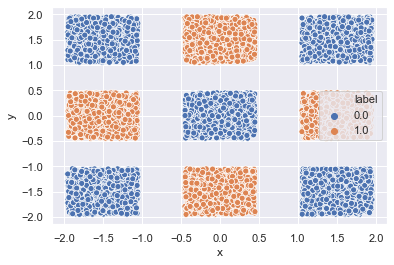

In [6]:
conf.num_distr = '5'
sns.scatterplot(x='x',y='y',hue='label',data=df)

In [7]:
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.from_numpy(x).type(torch.FloatTensor),
                                           torch.from_numpy(y.reshape(y.shape[0],1)).type(torch.int64)),
                                          batch_size=10, shuffle=True, num_workers=0)

In [8]:
def plot_means():
    means = []
    stds = []
    with torch.no_grad():
        for cls in range(2):
            for i in model.last_layer.centers[cls]:
                means.append(i[0].detach().numpy())
                stds.append(i[1].detach().numpy())
    means = np.array(means)
    print('mean')
    print(means)
    print('stds')
    print(np.log(1+np.exp(stds)))
    mean_len = len(means)
    plt.scatter(means[range(mean_len//2),0],means[range(mean_len//2),1], label='class 0')
    plt.scatter(means[range(mean_len//2, mean_len),0],means[range(mean_len//2,mean_len),1], label='class 1')
    plt.legend()

# Dynamic Estimator

In [9]:
conf.last_layer = 'DY'
model = Linear_base_model()
model.train_model(trainloader, verbose=0)

RuntimeError: size mismatch, m1: [10 x 2], m2: [784 x 200] at /Users/distiller/project/conda/conda-bld/pytorch_1579022036889/work/aten/src/TH/generic/THTensorMath.cpp:136

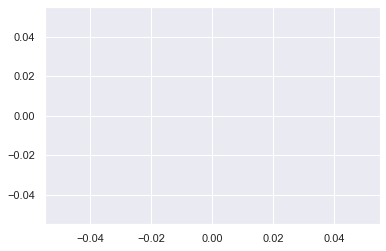

In [10]:
plt.plot(model.history['loss'])

mean
[[ 1.5768834  -1.5687174 ]
 [-1.5532168  -1.5535622 ]
 [-1.5613103   1.5530733 ]
 [-0.0023524  -0.00631394]
 [ 1.564893    1.5784953 ]
 [ 0.20019521  1.5662827 ]
 [ 0.00592316 -1.5722413 ]
 [-1.5570415  -0.01068391]
 [ 1.5520236  -0.01096856]
 [-0.19109653  1.5405813 ]]
stds
[[0.9692166  0.9702902 ]
 [0.9857333  0.9623792 ]
 [0.9675269  0.9768983 ]
 [0.8025236  0.8198174 ]
 [0.9782351  0.9842341 ]
 [0.517859   0.78975517]
 [0.8108221  1.0341873 ]
 [1.0049596  0.7931618 ]
 [1.0023626  0.8079244 ]
 [0.5342672  0.81951845]]


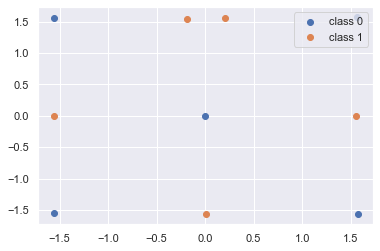

In [11]:
plot_means()

In [18]:
model.get_distr_index((x,y), False)

(tensor([1, 1, 1,  ..., 4, 4, 4]), tensor([0, 0, 0,  ..., 0, 0, 0]))

# Density Estimator

In [12]:
conf.last_layer = 'DE'
model = Linear_base_model()
model.train_model(trainloader, verbose=0)

KeyboardInterrupt: 

In [ ]:
plot_means()

# PNN

In [11]:
conf.last_layer = 'PNN'
model = Linear_base_model()
model.train_model(trainloader, verbose=0)

/opt/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([10, 1, 2])) that is different to the input size (torch.Size([10, 2])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


mean
[[ 1.56411028e+00  1.55931270e+00]
 [-2.90810496e-01 -2.83031017e-01]
 [-2.88969606e-01 -2.83577859e-01]
 [ 2.38478720e-01  1.15559384e-01]
 [-2.90095359e-01 -2.85690099e-01]
 [ 1.96057931e-01  1.56041765e+00]
 [-1.96407467e-01  1.55646360e+00]
 [ 1.54207730e+00  2.23239578e-04]
 [-1.32025182e-02 -1.56180942e+00]
 [-1.54217529e+00 -2.81274947e-03]]
stds
[[0.9101459  0.95933294]
 [1.7404866  1.7396675 ]
 [1.7409394  1.7428095 ]
 [0.31525898 0.35721606]
 [1.7430532  1.7408597 ]
 [0.52669984 0.79706323]
 [0.5413989  0.8039037 ]
 [0.99315643 0.78993547]
 [0.8081127  1.0405166 ]
 [0.9580231  0.786823  ]]


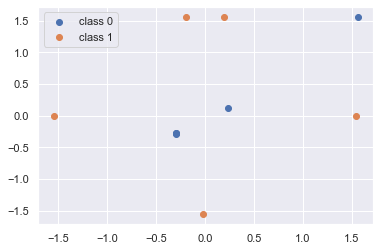

In [12]:
plot_means()

In [15]:
model(torch.from_numpy(x))

tensor([[0.4494, 0.1098],
        [0.5530, 0.1255],
        [0.5317, 0.1419],
        ...,
        [0.9381, 0.0431],
        [0.8886, 0.0241],
        [0.9108, 0.0546]], dtype=torch.float64, grad_fn=<StackBackward>)